# Importing Liberaries 📚

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Loading Data 📑

In [89]:
# Loading the CSV File
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
features = pd.read_csv("features.csv")
patient_notes = pd.read_csv("patient_notes.csv")
submission = pd.read_csv("sample_submission.csv")

warnings.filterwarnings('ignore')

# Functions

In [101]:
def dataset_information(df):
    print('Dataset Information')
    print('-------------------')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print(f'Number of total values: {df.size}')
    print(f'Number of missing values \n{df.isnull().sum()}')
    print()

# Numerical Analysis

## Train Dataset Information

**Column Description**

| Column Name | Data Type | Description |
|------------|-----------|-------------|
| id | int | Unique identifier for each patient note / feature pair. |
| pn_num | int | The patient note annotated in this row. |
| feature_num | int | The feature annotated in this row. |
| case_num | int | The case to which this patient note belongs. |
| annotation | str | The text(s) within a patient note indicating a feature. A feature may be indicated multiple times within a single note. |
| location | str | Character spans indicating the location of each annotation within the note. Multiple spans may be needed to represent an annotation, in which case the spans are delimited by a semicolon ;. |
 


In [39]:
dataset_information(train)

Dataset Information
-------------------
Number of rows: 14300
Number of columns: 7
Number of total values: 100100
Number of missing values 
id             0
case_num       0
pn_num         0
feature_num    0
annotation     0
location       0
annot_count    0
dtype: int64



In [40]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location,annot_count
0,00016_000,0,16,0,[dad with recent heart attcak],[696 724],1
1,00016_001,0,16,1,"[mom with ""thyroid disease]",[668 693],1
2,00016_002,0,16,2,[chest pressure],[203 217],1
3,00016_003,0,16,3,"[intermittent episodes, episode]","[70 91, 176 183]",2
4,00016_004,0,16,4,[felt as if he were going to pass out],[222 258],1


In [54]:
# Question 1
# How many unique patients are in the dataset?
print(f'Number of unique patients: {train["pn_num"].nunique()}')

# Question 2
# How many unique notes are in the dataset?
print(f'Number of unique notes: {train["case_num"].nunique()}')

Number of unique patients: 1000
Number of unique notes: 10


## Overview

From the observation above, it is clear that we have:
 
* <i> Total of <b>6</b> columns and <b>14300</b> rows in <b>train</b> data.</i><br>
* <i> Train data contains <b>85800</b> observation with <b>0</b> missing values.</i><br>
* <i> <b>1000</b> unique patient ids and <b>10</b> unique cases are present.</i><br>
* <i> Multilple annotations and locations are present in single rows. </i><br>
</div>

## Test Dataset Information

**Column Description**
| Column Name | Data Type | Description |
|------------|-----------|-------------|
| pn_num | int | Unique identifier for each patient note. |
| case_num | int | A unique identifier for the clinical case a patient note represents. |
| pn_history | str | The text of the encounter as recorded by the test taker. |

In [55]:
dataset_information(test)

Dataset Information
-------------------
Number of rows: 5
Number of columns: 4
Number of total values: 20
Number of missing values 
id             0
case_num       0
pn_num         0
feature_num    0
dtype: int64



In [56]:
test.head()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


## Patient Notes Data Information

In [57]:
dataset_information(patient_notes)

Dataset Information
-------------------
Number of rows: 42146
Number of columns: 3
Number of total values: 126438
Number of missing values 
pn_num        0
case_num      0
pn_history    0
dtype: int64



In [58]:
patient_notes.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [68]:
# Question 1
# How many patients per case are unequally distributed?
print(f'Number of patients per case: \n{train["pn_num"].value_counts()}')

Number of patients per case: 
50072    18
56535    18
56697    18
56841    18
57026    18
         ..
71449     9
71432     9
71344     9
71235     9
74087     9
Name: pn_num, Length: 1000, dtype: int64


In [67]:
# Queston 2
# Which case has the most unequally distributed notes?
print(f'Number of notes per case: \n{patient_notes["case_num"].value_counts()}')

Number of notes per case: 
3    9753
5    6909
4    5405
9    5151
8    4196
7    4101
0    2268
2    1958
6    1597
1     808
Name: case_num, dtype: int64


<b>Observations</b><br>
 
* <i> There are total of <b>3</b> columns and <b>42146</b> rows in <b>Patient Notes</b> data.</i><br>
* <i> Patient Notes Data contain <b>126438</b> observation with <b>0</b>  missing values.</i><br>
* <i> Number of patients per case are unequally distributed with <b>Case 3</b> having maximum and <b>Case 1</b> having minimum.</i><br>
</div>

### Sample Patient Note 
Let's take a sample patient note from the dataset.

In [87]:
# Taking a random record
random_record = random.randint(0, len(patient_notes))

# Patient Note
patient_notes.iloc[random_record]['pn_history']

'35 y M c/o with epigastric pain located in the middle of his abdomen. Pain scale is 5/10. It is a burning and nawing pain. Started 2 months ago. Has been progressively getting worse. There were no precipating events or previous episodes of this pain. Pt has been taking tums for the pain however it is no longer working. He has nausea but not vomiting. Pt has decrease appeittie due to bloating after eating. Pt has had darker stool recently. He is feeling lethargic for 2 wks because the pain is waking him up from his sleep. Pt eats fast food and has been excercising 3-4 a week. He has stopped due to the pain.\r\nRos-negative as above\r\nPMH- Back Pain/muscle spasms-started mid 20s, pain comes and goes, it is located all over his back\r\nAllergies-none, Medications- taking Moltren 2 pills a week\r\nFH- Uncle had bleeding ulcer\r\nSH- Denies illicit drug use, smokes 0.5/1 PPD since he was 15 yr, drinks a few beers\r\nSexual- not sexually acitive'

From the note above, it is clear that multiple annotations are given

### Sample Patient Location

In [95]:
# Checking with a random record
randomID = random.randint(0, len(train))
train.iloc[randomID:randomID+5]
# train['location'].iloc[randomID:randomID+5]


,id,case_num,pn_num,feature_num,annotation,location
7225,51439_501,5,51439,501,['female'],['6 12']
7226,51439_502,5,51439,502,[],[]
7227,51439_503,5,51439,503,['episode shortness of breath'],['399 406;442 461']
7228,51439_504,5,51439,504,"['palpitations', 'heart racing']","['36 48', '411 423']"
7229,51439_505,5,51439,505,[],[]


In location column, we can see that there are multiple locations where the annotation is present, and each location is separated by a semicolon `;`. Another thing to notice is that empty annotations leads to empty location.

## Features CSV Information

**Column Description**

| Column Name | Data Type | Description |
|------------|-----------|-------------|
| feature_num | int | Unique identifier for each feature. |
| case_num | int | A unique identifier for each case. |
| feature_text | str | A description of the feature. |

### Quick view of features Data

In [106]:
dataset_information(features)

Dataset Information
-------------------
Number of rows: 143
Number of columns: 3
Number of total values: 429
Number of missing values 
feature_num     0
case_num        0
feature_text    0
dtype: int64



In [107]:
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [114]:
# Question 1
# How many cases are unequally distributed per patient?
print(f'Number of cases per patient: \n{features["case_num"].value_counts()}')

Number of cases per patient: 
5    18
8    18
2    17
9    17
3    16
0    13
1    13
6    12
4    10
7     9
Name: case_num, dtype: int64


In [117]:
# Question 2
# What is the average length of the notes per patient?
print(f'Average length of notes per patient: \n{features["feature_text"].str.len().mean()}')

Average length of notes per patient: 
23.20979020979021


<b>Observations in Features Data:</b><br>
 
* <i> There are total of <b>3</b> columns and <b>143</b> rows in <b>Features</b> data.</i><br>
* <i> Patient Notes Data contain <b>429</b> observation with <b>0</b>  missing values.</i><br>
* <i> Number of patients per case are unequally distributed with <b>Case 5</b> and <b>Case 8</b> having maximum and <b>Case 7</b> having minimum.</i><br>
* <i> Average length of <b>feature_text</b> column is <b>23.20</b>. </i><br>
</div>

### Sample Feature text

In [111]:
# find random sample feature text
random_feature = random.randint(0, len(features)) 
features.iloc[random_feature]['feature_text']

'Increased-frequency-recently'

## Visulization
Since we are done with analysing our data, we will now visualize to give more meaning to our data.

### Patient Notes Distribution (Per case) 

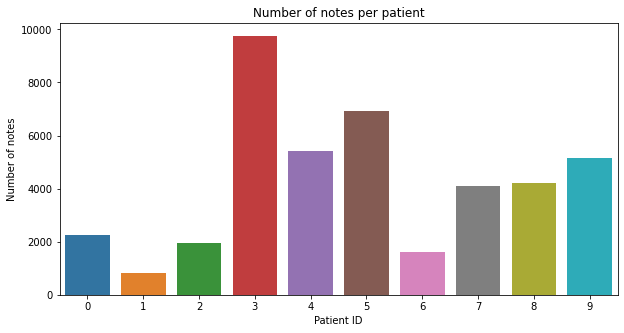

In [10]:
notes_counts = patient_notes.groupby("case_num").count()

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=notes_counts.index, y=notes_counts.pn_history)
plt.title("Number of notes per patient")
plt.xlabel("Patient ID")
plt.ylabel("Number of notes")
plt.show()


### Patient Notes Length Distribution 

Average length of Patient History -  818.1768139325203
Median length of Patient History -  859.0
Maximum length of Patient History -  950
Minimum length of Patient History -  30


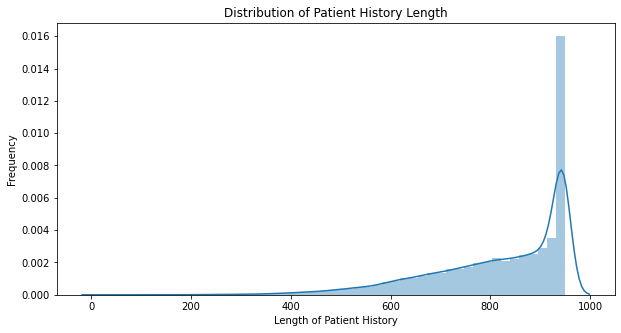

In [104]:
all_notes = []
all_notes_len = []

# Finding Patients Distributed 
for notes in patient_notes['pn_history']:
    all_notes.append(notes)
    all_notes_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_notes_len))
print("Median length of Patient History - ",np.median(all_notes_len))
print("Maximum length of Patient History - ",np.max(all_notes_len))
print("Minimum length of Patient History - ",np.min(all_notes_len))

# Creating plot of patient history
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(all_notes_len) 
plt.title("Distribution of Patient History Length")
plt.xlabel("Length of Patient History")
plt.ylabel("Frequency")
plt.show()

### Feature Distribution (per Case) 

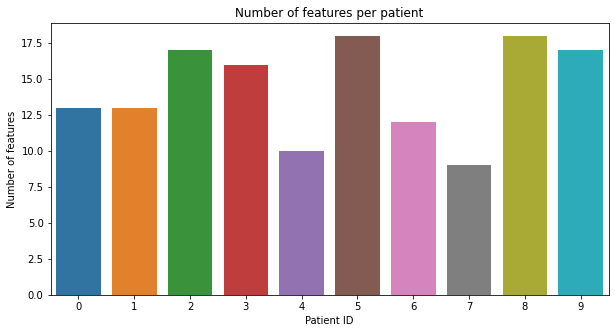

In [14]:
feature_counts = features.groupby("case_num").count()
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=feature_counts.index, y=feature_counts.feature_text)
plt.title("Number of features per patient")
plt.xlabel("Patient ID")
plt.ylabel("Number of features")
plt.show()


### Feature Length Distribution 

Average length of Patient History -  23.20979020979021
Median length of Patient History -  19.0
Maximum length of Patient History -  68
Minimum length of Patient History -  3


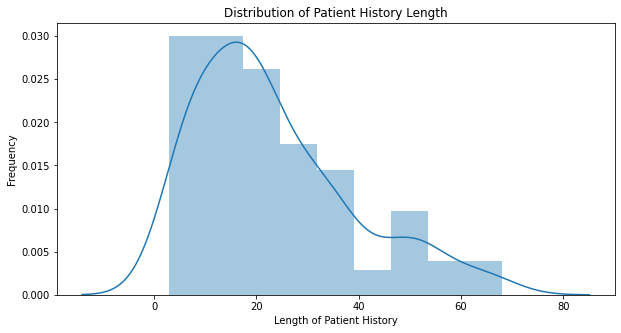

In [118]:
all_feat = []
all_feat_len = []
for notes in features['feature_text']:
    all_feat.append(notes)
    all_feat_len.append(len(notes))
print("Average length of Patient History - ",np.mean(all_feat_len))
print("Median length of Patient History - ",np.median(all_feat_len))
print("Maximum length of Patient History - ",np.max(all_feat_len))
print("Minimum length of Patient History - ",np.min(all_feat_len))

fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(all_feat_len) 
plt.title("Distribution of Patient History Length") 
plt.xlabel("Length of Patient History")
plt.ylabel("Frequency")
plt.show()
  

<b>Observations in Patient analysis:</b><br>
 
* <i> There are total of <b>1000</b> unique patients</i><br>
* <i> For every unqiue <b>pn_num</b> there are several rows depecting several anotations in patient notes.</i><br>
</div>

## Patient analysis 

### Total Annotations Analysis

In [164]:
# All Annotations
print('Number of annotations: ', train['annotation'].count())

# Empty square Bracket Annotations 
print('Number of empty square bracket annotations: ', train['annotation'].str.count('\[\]').sum())

# Average length of annotations
print('Average length of annotations: ', train['annotation'].str.len().mean())

Number of annotations:  14300
Number of empty square bracket annotations:  4399
Average length of annotations:  18.1779020979021


#### Annotation Count Distribution

In [173]:
print('List of annotations that are repeated: \n', train['annotation'].value_counts()[train['annotation'].value_counts() > 1])


List of annotations that are repeated: 
 []                         4399
['F']                       304
['female']                  217
['M']                       127
['nausea']                  105
                           ... 
['1-2 beers a week']          2
['headache diffuse']          2
['lightheadness']             2
['associated dyspnea']        2
['has had for 5 years']       2
Name: annotation, Length: 775, dtype: int64


**Quick Summary**
* <i> There are total of <b>14300</b> annotations present in train data</i><br>
* <i> A total of <b>4399</b> annotations are empty and their corresponding location is an <b>empty list</b></i><br>
* <i> Average length of annotations is <b>18.17</b>. </i>

### Selecting a Patient

In [139]:
# Selecting a random record from the Train
patient_id = train.iloc[random.randint(0, len(train))]['pn_num']

# Showing the records of the patient
patient_df = train[train['pn_num'] == patient_id]
patient_df

,id,case_num,pn_num,feature_num,annotation,location
13756,93712_900,9,93712,900,[],[]
13757,93712_901,9,93712,901,['20 year old'],['16 27']
13758,93712_902,9,93712,902,['yesterday'],['106 115']
13759,93712_903,9,93712,903,['body aches'],['477 487']
13760,93712_904,9,93712,904,['holocranial headache'],['72 92']
13761,93712_905,9,93712,905,"['neck stiffness', 'neck pain']","['312 326', '312 316;331 335']"
13762,93712_906,9,93712,906,['vomiting'],['399 407']
13763,93712_907,9,93712,907,[],[]
13764,93712_908,9,93712,908,['nausea'],['358 364']
13765,93712_909,9,93712,909,[],[]


### Patient Notes and Annotations 
This will help in finding how does the patient notes look like and how many annotations are present.

In [141]:
# Finding Patient Notes
print("Patient Notes")
print(patient_notes[patient_notes["pn_num"] == patient_id]["pn_history"].iloc[0])

Patient Notes
Ms. Madden is a 20 year old female who presents today with sudden onset holocranial headache that started yesterday morning. She states that she was awoken with intense pain. She states that the pain is dull and constant. There is not a specific area of the head that hurts the most. She does state she has some neck stiffness and pain. She has photophonia, nausea, decreased appetite, 3 episoes of vomiting. Denies phonophobia, diarrhea, constipation. States that she has had body aches since yesterday as well. She has not experienced anything like this before. She does get about 2 headaches a year, but are different than the one she is experiencing now. She does not recall any sick contacts. She has been taking birth control pills for 2 years. NKDA. No significant medical history. Mom has a history of migraine headaches that are well controlled with medications. Does use marijuana occasionally, but denis injection drug use.


In [142]:
# Annotations
print('Annotaions:')
for i in range(len(patient_df)):
    print(patient_df["annotation"].iloc[i])

Annotaions:
[]
['20 year old']
['yesterday']
['body aches']
['holocranial headache']
['neck stiffness', 'neck pain']
['vomiting']
[]
['nausea']
[]
[]
[]
['Mom migraine']
['female']
['photophonia']
['does not recall any sick contacts']
[]


### Graphing Annotations Distribution

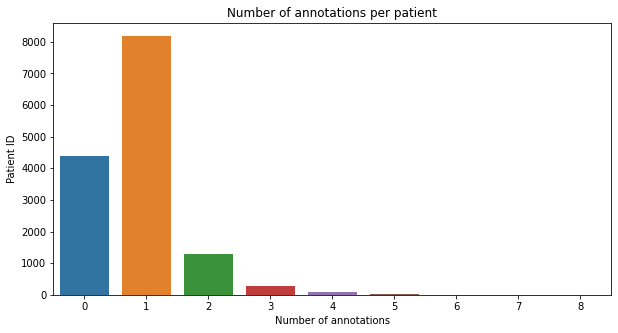

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=train["annot_count"].value_counts().sort_index().index, y=train["annot_count"].value_counts().sort_index())
plt.title("Number of annotations per patient") 
plt.xlabel("Number of annotations")
plt.ylabel("Patient ID")
plt.show()

### Annotation Length Distribution

Average length of Annotations -  16.528445316331535


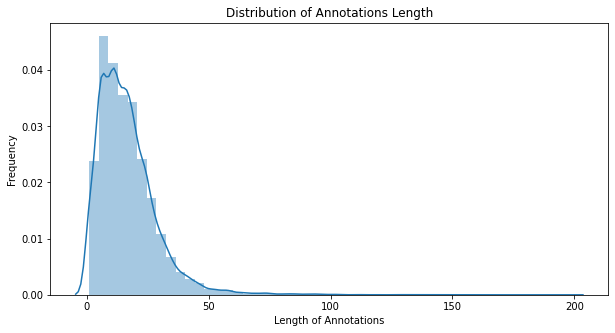

In [22]:
annot_lengths = []
all_annot_words = []
for annot in train["annotation"]:
    for words in annot:
        annot_lengths.append(len(words))
        all_annot_words.append(words)
print("Average length of Annotations - ",np.mean(annot_lengths))
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(annot_lengths)
plt.title("Distribution of Annotations Length")
plt.xlabel("Length of Annotations")
plt.ylabel("Frequency")
plt.show()